In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from benchmarks.runs.exploring_utils import RunAnalyser, adaptive_filter, non_adaptive_filter, model_filter
import re

In [2]:
run_path = '../'
test_name = 'Kovasznay_scheduled'
test_path = os.path.join(run_path, test_name)

In [3]:
runs = sorted([m for m in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, m))])
analyser = RunAnalyser(runs, test_path)

<>:1: SyntaxWarning: invalid escape sequence '\['
<>:1: SyntaxWarning: invalid escape sequence '\['
/tmp/ipykernel_1107966/1185013771.py:1: SyntaxWarning: invalid escape sequence '\['
  analyser.plot_mses(filter=lambda x: 'FCN_[32, 32]' in x or re.match('OptimizedStackedCKAN_deg\[4, 4]_h\[[0-9]*]', x))


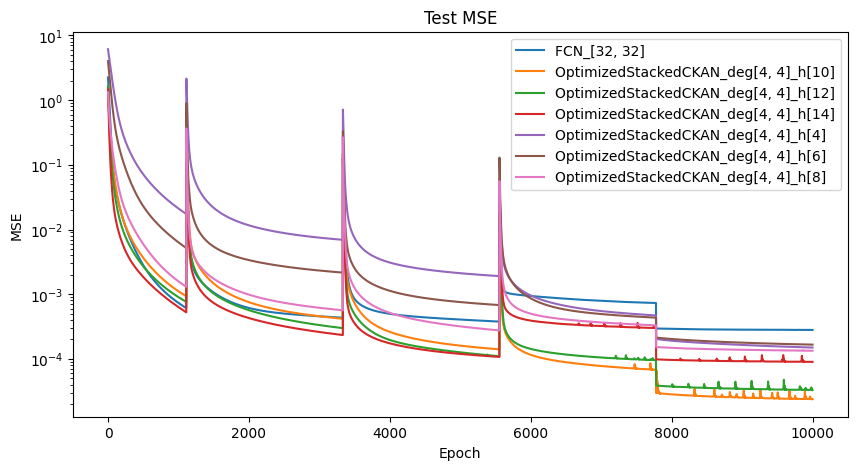

In [4]:
analyser.plot_mses(filter=lambda x: 'FCN_[32, 32]' in x or re.match('OptimizedStackedCKAN_deg\[4, 4]_h\[[0-9]*]', x))

<Figure size 700x700 with 0 Axes>

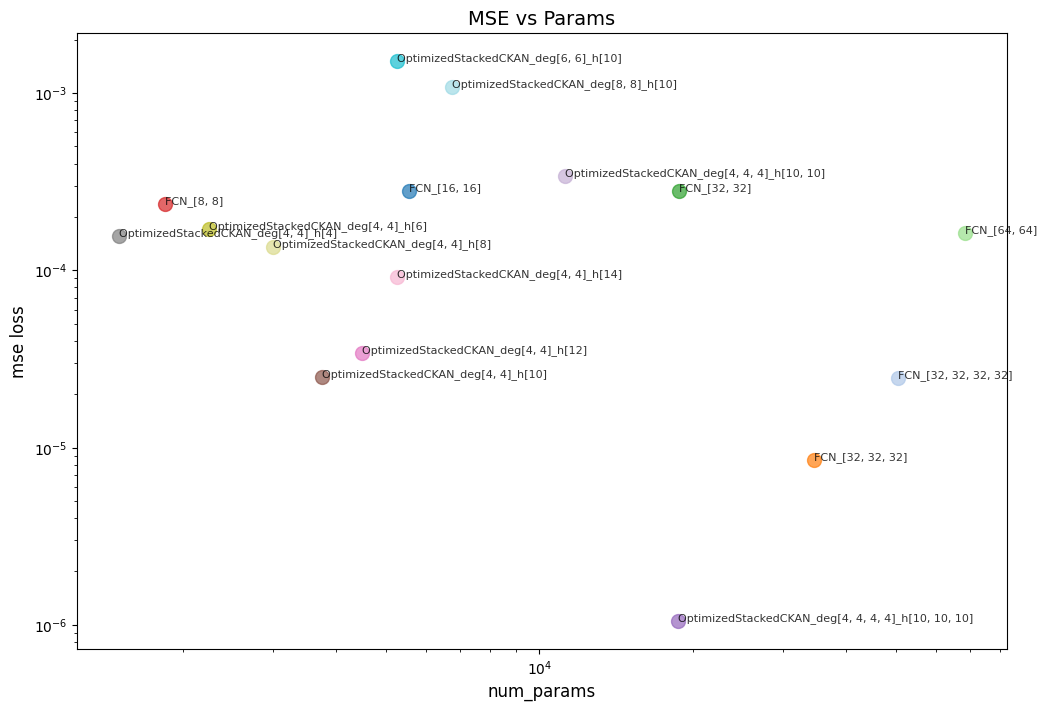

In [5]:
analyser.plot_mse_over_params()

<Figure size 700x700 with 0 Axes>

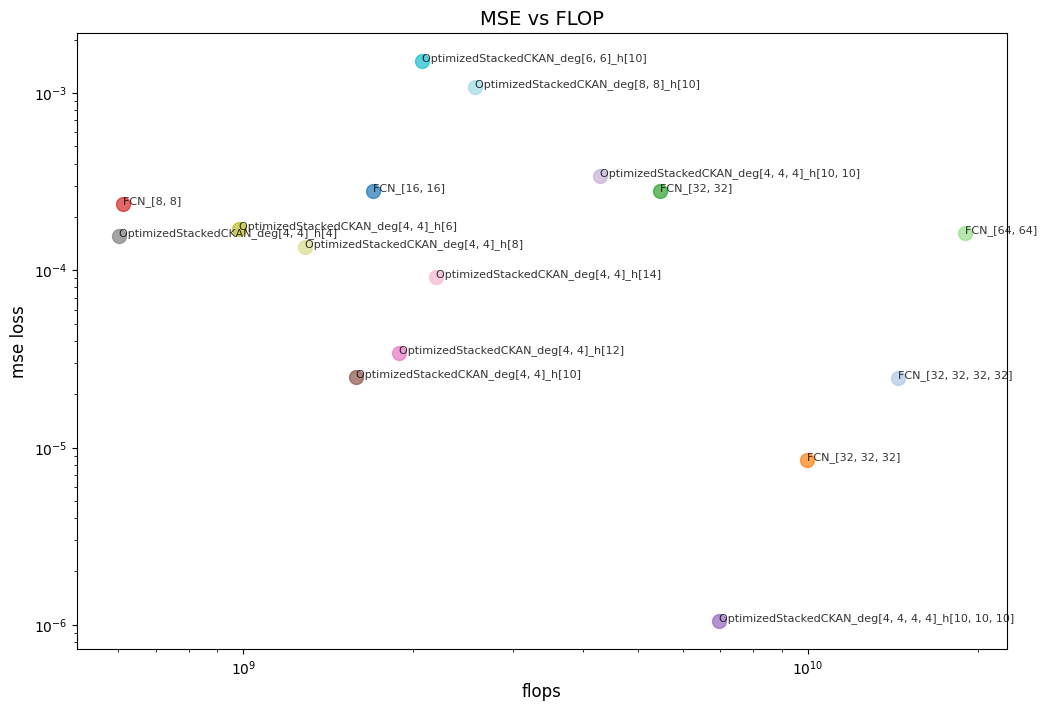

In [6]:
analyser.plot_mse_over_flops()

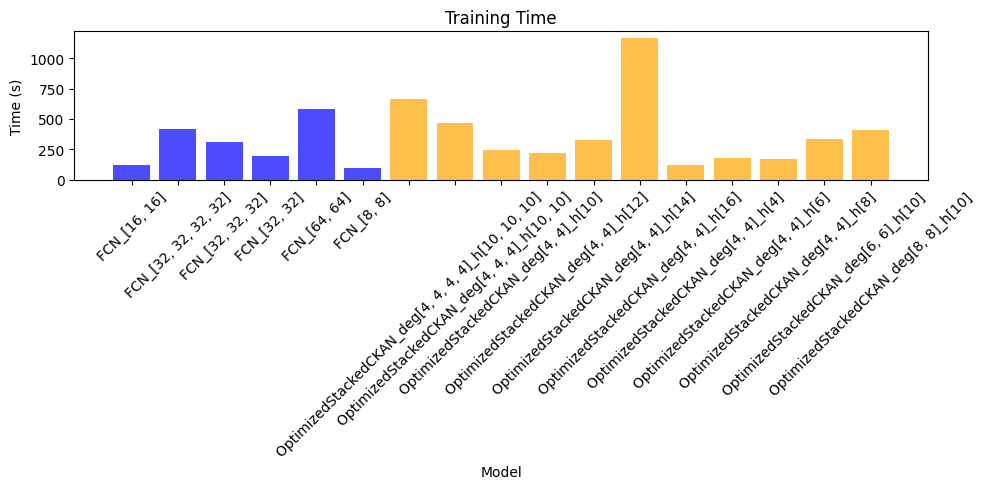

In [7]:
analyser.plot_training_times(filter=lambda x: 'Stacked' in x or 'FCN' in x)

<Figure size 1000x500 with 0 Axes>

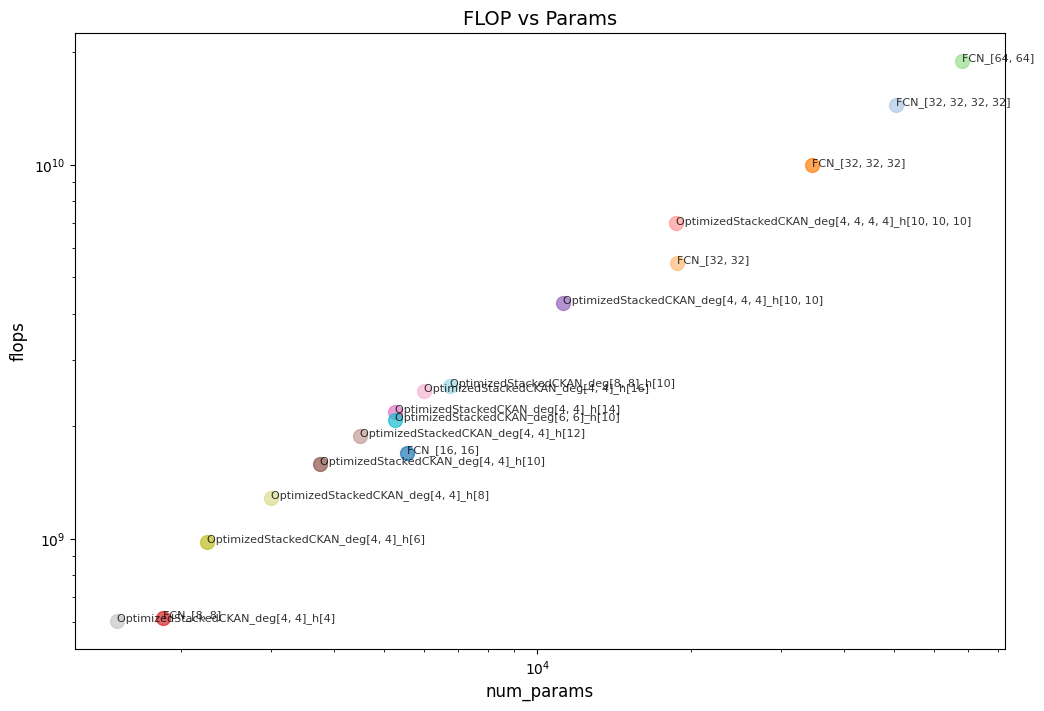

In [8]:
analyser.plot_flops_over_params()
# plt.xscale('linear')
# plt.yscale('linear')

In [9]:
import json

with open('/vol/bitbucket/ss7921/FBPINNs/benchmarks/runs/Kovasznay_scheduled/FCN_[64, 64]/test_meta.json', 'r') as f:
    meta = json.load(f)
print(meta['flops'])

[18939209728.0, 33018195968.0, 41836257280.0, 33017878528.0, 18938572800.0]


In [10]:
model1 = 'OptimizedStackedCKAN_deg[4, 4, 4, 4]_h[10, 10, 10]'
model2 = 'FCN_[32, 32, 32]'
# model2 = 'OptimizedStackedCKAN_deg[4, 4]_h[8]'
with open(f'/vol/bitbucket/ss7921/FBPINNs/benchmarks/runs/Kovasznay_scheduled/{model1}/test_0_10000.npy', 'rb') as f:
    pred0_ckan = np.load(f).reshape(200, 200, -1)
with open(f'/vol/bitbucket/ss7921/FBPINNs/benchmarks/runs/Kovasznay_scheduled/{model2}/test_0_10000.npy', 'rb') as f:
    pred0_fcn = np.load(f).reshape(200, 200, -1)
with open(f'/vol/bitbucket/ss7921/FBPINNs/benchmarks/runs/Kovasznay_scheduled/OptimizedStackedCKAN_deg[4, 4]_h[10]/test_exact_0.npy', 'rb') as f:
    exact0 = np.load(f).reshape(200, 200, -1)

rae = lambda exact, pred: (np.abs(exact - pred) / (np.abs(exact)))
rE = lambda exact, pred: ((exact - pred) / (np.abs(exact)))

/tmp/ipykernel_1107966/3939254366.py:11: RuntimeWarning: invalid value encountered in divide
  rae = lambda exact, pred: (np.abs(exact - pred) / (np.abs(exact)))


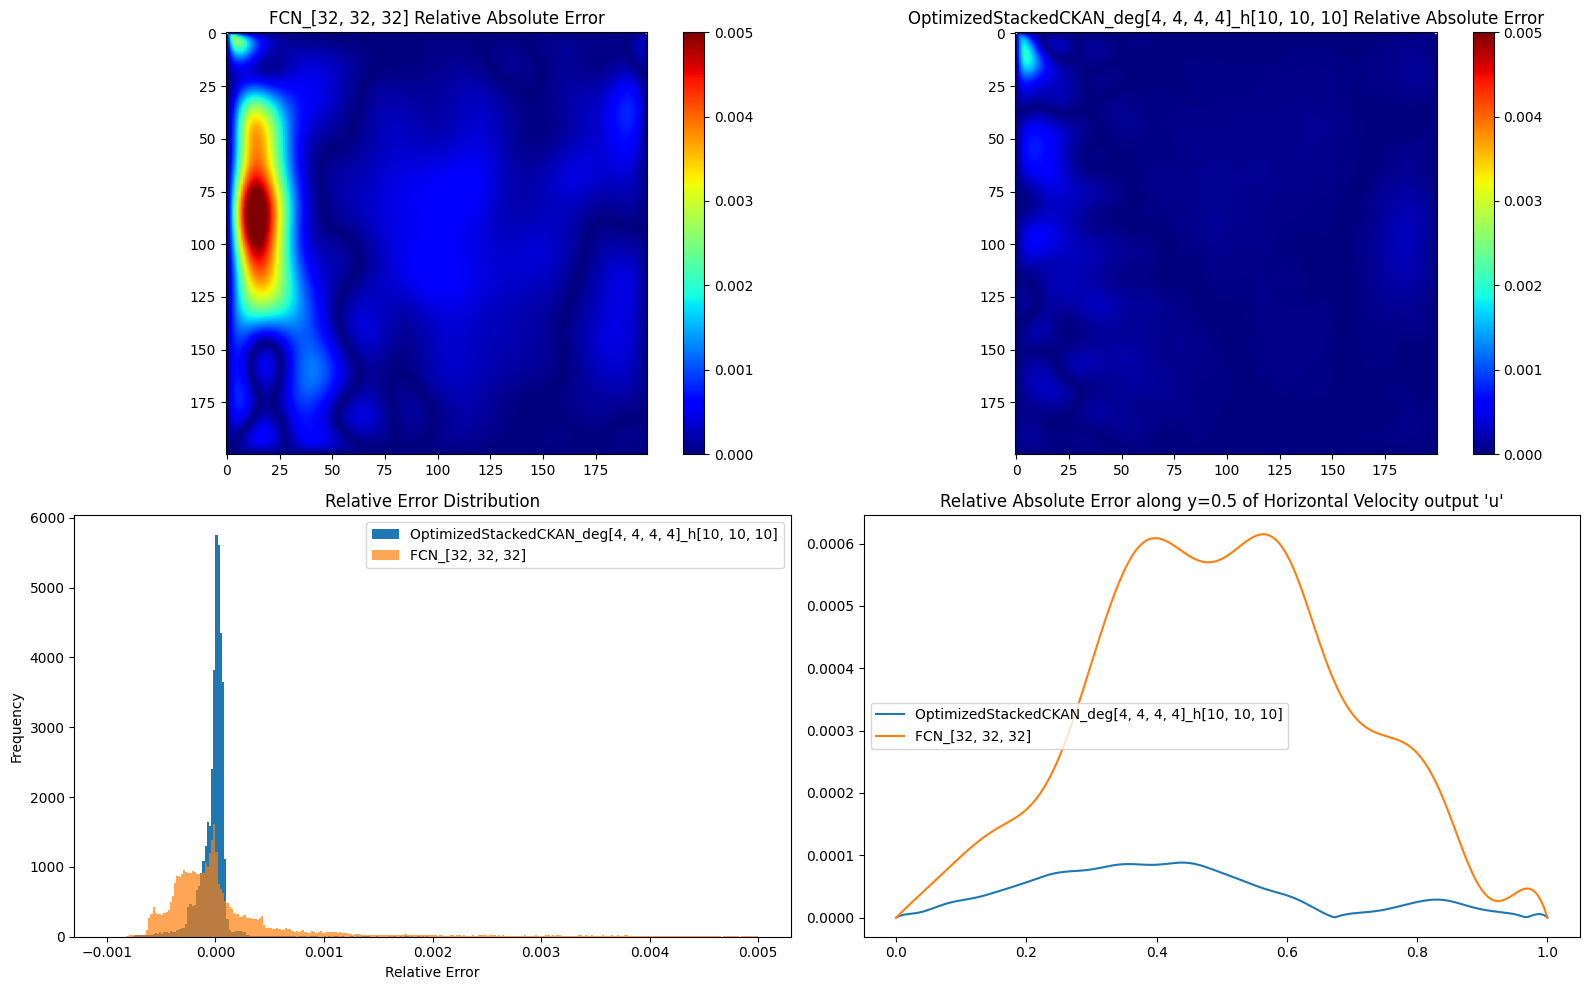

In [15]:
plt.figure(figsize=(16, 10))

slice=0
vmin, vmax = 0, 0.005
r=(-0.001, vmax)
plt.subplot(2, 2, 1)
plt.imshow(rae(exact0[:, :, slice], pred0_fcn[:, :, slice]), cmap='jet', vmin=vmin, vmax=vmax)
plt.title(f'{model2} Relative Absolute Error')
plt.colorbar()

plt.subplot(2, 2, 2)
plt.imshow(rae(exact0[:, :, slice], pred0_ckan[:, :, slice]), cmap='jet', vmin=vmin, vmax=vmax)
plt.title(f'{model1} Relative Absolute Error')
plt.colorbar()

plt.subplot(2, 2, 3)
re_ckan = rE(exact0[1:199, 1:199, slice], pred0_ckan[1:199, 1:199, slice])
re_fcn = rE(exact0[1:199, 1:199, slice], pred0_fcn[1:199, 1:199, slice])
plt.hist(re_ckan.flatten(), bins=300, label=model1, range=r)
plt.hist(re_fcn.flatten(), bins=300, label=model2, alpha=0.7, range=r)
plt.legend()
plt.xlabel('Relative Error')
plt.ylabel('Frequency')
plt.title('Relative Error Distribution')

xs = np.linspace(0, 1, 200)
plt.subplot(2, 2, 4)
plt.plot(xs, rae(exact0[:, 100, slice], pred0_ckan[:, 100, slice]), label=model1)
plt.plot(xs, rae(exact0[:, 100, slice], pred0_fcn[:, 100, slice]), label=model2)
plt.legend()
plt.title('Relative Absolute Error along y=0.5 of Horizontal Velocity output \'u\'')

plt.tight_layout()
plt.show()

In [9]:
analyser.runs

['FCN_[16, 16]',
 'FCN_[32, 32, 32, 32]',
 'FCN_[32, 32, 32]',
 'FCN_[32, 32]',
 'FCN_[64, 64]',
 'FCN_[8, 8]',
 'OptimizedStackedCKAN_deg[4, 4, 4, 4]_h[10, 10, 10]',
 'OptimizedStackedCKAN_deg[4, 4, 4]_h[10, 10]',
 'OptimizedStackedCKAN_deg[4, 4]_h[10]',
 'OptimizedStackedCKAN_deg[4, 4]_h[12]',
 'OptimizedStackedCKAN_deg[4, 4]_h[14]',
 'OptimizedStackedCKAN_deg[4, 4]_h[4]',
 'OptimizedStackedCKAN_deg[4, 4]_h[6]',
 'OptimizedStackedCKAN_deg[4, 4]_h[8]',
 'OptimizedStackedCKAN_deg[6, 6]_h[10]',
 'OptimizedStackedCKAN_deg[8, 8]_h[10]']

In [ ]:
ana

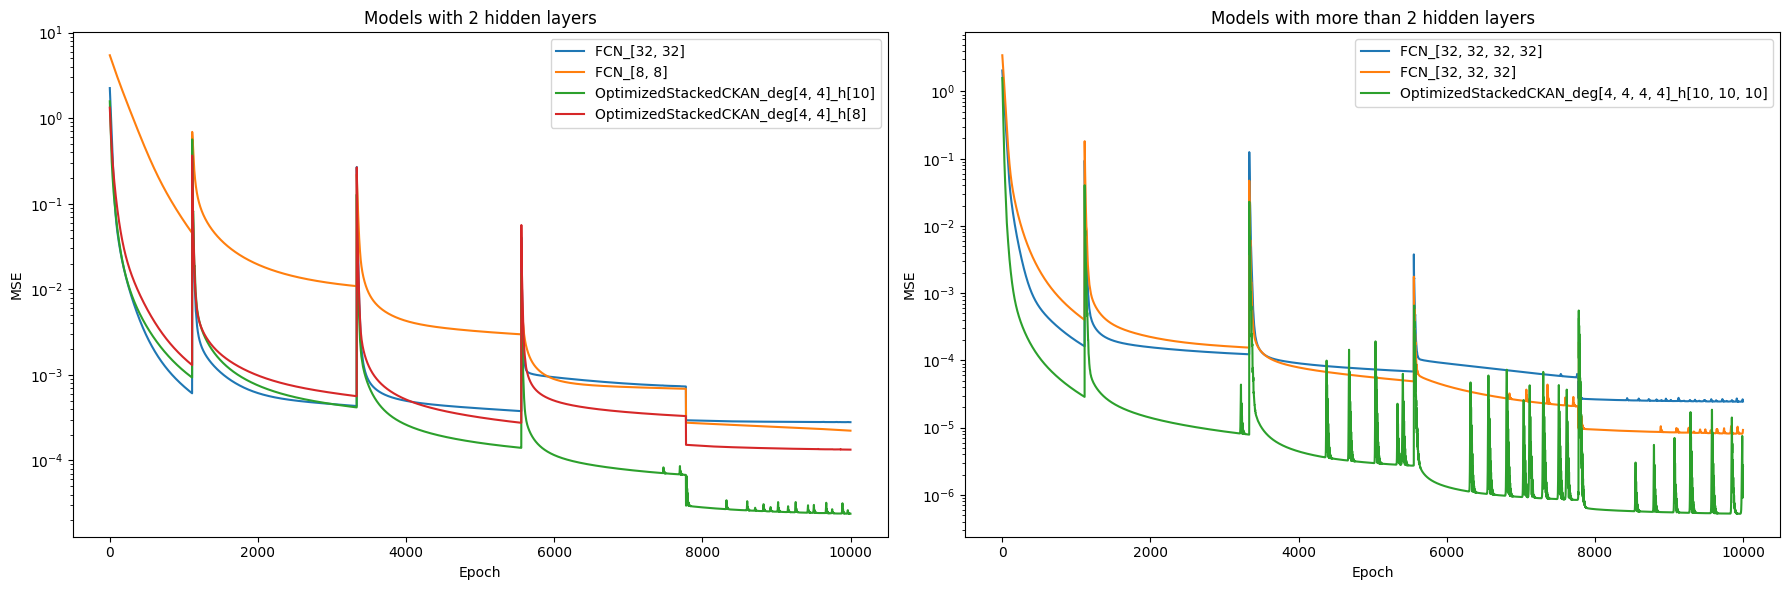

In [20]:
plt.figure(figsize=(18, 6))
l1 = [
    'FCN_[8, 8]',
    'FCN_[32, 32]',
    'OptimizedStackedCKAN_deg[4, 4]_h[8]',
    'OptimizedStackedCKAN_deg[4, 4]_h[10]'
]
l2 = [
    'FCN_[32, 32, 32]',
    'FCN_[32, 32, 32, 32]',
    'OptimizedStackedCKAN_deg[4, 4, 4, 4]_h[10, 10, 10]'
]

plt.subplot(1, 2, 1)
analyser.plot_mses(lambda x: x in l1, noshow=True)
plt.title('Models with 2 hidden layers')

plt.subplot(1, 2, 2)
analyser.plot_mses(lambda x: x in l2, noshow=True)
plt.title('Models with more than 2 hidden layers')

plt.tight_layout()
plt.show()